## Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.


## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2022.

Read the data for January. How many columns are there?

* 16
* 17
* 18
* 19

In [19]:
import pandas as pd
import numpy as np
import sklearn

In [20]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet')

In [21]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [22]:
# Number of columns
len(df.columns)

19

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in January?

* 41.45
* 46.45
* 51.45
* 56.45

In [23]:
duration = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/ pd.Timedelta(minutes=1)
df['duration'] = duration
duration = duration.round(2)
std_duration = duration.std()

In [24]:
print("The standard deviation of the trips duration in January is {:.2f}".format(std_duration))

The standard deviation of the trips duration in January is 46.45



## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* 98%

In [25]:
outlier_removed = df['duration'][(df['duration'] >= 1) & (df['duration'] <= 60)]

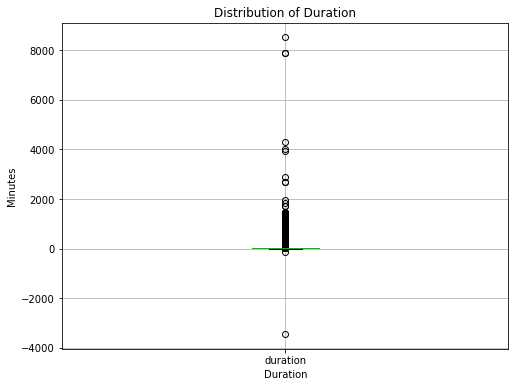

In [26]:
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(8, 6))
df.boxplot(column=['duration'])

# Add labels and title
plt.xlabel('Duration')
plt.ylabel('Minutes')
plt.title('Distribution of Duration')
plt.show()

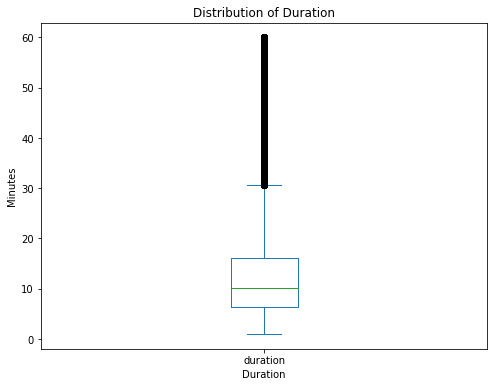

In [29]:
import matplotlib.pyplot as plt

# Assuming you have a Series named 'duration'
duration_series = outlier_removed

# Create the box plot
plt.figure(figsize=(8, 6))
duration_series.plot.box()

# Add labels and title
plt.xlabel('Duration')
plt.ylabel('Minutes')
plt.title('Distribution of Duration')
plt.show()

In [31]:
fraction_left  = len(outlier_removed)/len(df)
print(f"The fraction left after ouliers have been reomved is {fraction_left* 100}")

The fraction left after ouliers have been reomved is 98.27547930522405
